keras-->to take dataset from keras

tensorflow--> acts as backend

sequential-->in what sequence we gona do

dropout-->to drop unwanted pixels


categorial-->to categorize pixels

we are using cifar10 dataset-->has 6000 images for each category

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout
#from tensorflow.keras import layers
from keras.utils import to_categorical
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import cifar10

In [ ]:
(xtrain,ytrain),(xtest,ytest)=cifar10.load_data()

170498071/170498071 [==============================] - 2s 0us/step


In [ ]:
type(xtrain)

numpy.ndarray

gives shape-->(80% of data for training,img size,img size,rgb)

In [ ]:
xtrain.shape

(50000, 32, 32, 3)

In [ ]:
xtrain[10]

array([[[0.00081507, 0.00099962, 0.00081507],
        [0.00083045, 0.00096886, 0.00079969],
        [0.00086121, 0.00092272, 0.00076894],
        ...,
        [0.0007228 , 0.00078431, 0.00076894],
        [0.00063053, 0.00069204, 0.00067666],
        [0.00036909, 0.0004306 , 0.00041522]],

       [[0.00070742, 0.00090734, 0.00063053],
        [0.00081507, 0.00095348, 0.00069204],
        [0.00083045, 0.00090734, 0.00067666],
        ...,
        [0.00064591, 0.00070742, 0.00069204],
        [0.00059977, 0.00066128, 0.00064591],
        [0.0004306 , 0.00049212, 0.00047674]],

       [[0.00069204, 0.00090734, 0.00058439],
        [0.00076894, 0.00092272, 0.00063053],
        [0.00070742, 0.00079969, 0.00052288],
        ...,
        [0.00058439, 0.00064591, 0.00063053],
        [0.00055363, 0.00061515, 0.00059977],
        [0.00044598, 0.0005075 , 0.00049212]],

       ...,

       [[0.00109189, 0.00127643, 0.00101499],
        [0.00113802, 0.00127643, 0.00101499],
        [0.0012303 , 0

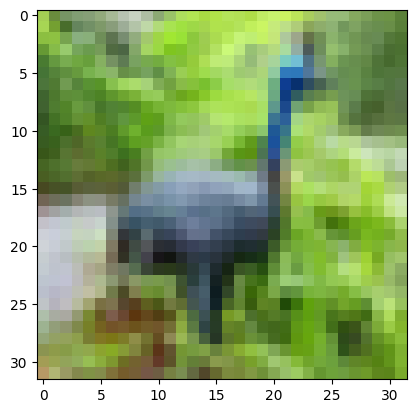

In [ ]:
img0=plt.imshow(xtrain[6])

In [ ]:
lab1=ytrain[10]
print(lab1)


[4]


In [ ]:
classification=['airplane','automobile','bird','cat','deer','dog','frog','horse','ship','truck']

In [ ]:
print('image class is:',classification[ytrain[4][0]])

image class is: automobile


In [ ]:
ytrain_one_hot=to_categorical(ytrain)
ytest_one_hot=to_categorical(ytest)

In [ ]:
#normalize the pixel values to see the depth of color in the pixel
xtrain=xtrain/255
xtest=xtest/255

3D matrix-->32,3

In [ ]:
xtrain[10]

array([[[0.00081507, 0.00099962, 0.00081507],
        [0.00083045, 0.00096886, 0.00079969],
        [0.00086121, 0.00092272, 0.00076894],
        ...,
        [0.0007228 , 0.00078431, 0.00076894],
        [0.00063053, 0.00069204, 0.00067666],
        [0.00036909, 0.0004306 , 0.00041522]],

       [[0.00070742, 0.00090734, 0.00063053],
        [0.00081507, 0.00095348, 0.00069204],
        [0.00083045, 0.00090734, 0.00067666],
        ...,
        [0.00064591, 0.00070742, 0.00069204],
        [0.00059977, 0.00066128, 0.00064591],
        [0.0004306 , 0.00049212, 0.00047674]],

       [[0.00069204, 0.00090734, 0.00058439],
        [0.00076894, 0.00092272, 0.00063053],
        [0.00070742, 0.00079969, 0.00052288],
        ...,
        [0.00058439, 0.00064591, 0.00063053],
        [0.00055363, 0.00061515, 0.00059977],
        [0.00044598, 0.0005075 , 0.00049212]],

       ...,

       [[0.00109189, 0.00127643, 0.00101499],
        [0.00113802, 0.00127643, 0.00101499],
        [0.0012303 , 0

In [ ]:
#create the architecture
model=Sequential()
#first conv layer-->32 pixels diving to 5x5 matrix
model.add(Conv2D(32,(5,5),activation='relu',input_shape=(32,32,3)))
#Pooling Layer
model.add(MaxPool2D(pool_size=(2,2)))
#second conv-->32 pixels diving to 5x5 matrix
model.add(Conv2D(32,(5,5),activation='relu'))
#Pooling Layer two
model.add(MaxPool2D(pool_size=(2,2)))

#flattening layer
model.add(Flatten())

#add a layer
model.add(Dense(1000,activation='relu'))
#add Dropout layer
model.add(Dropout(0.5))

#add a layer
model.add(Dense(500,activation='relu'))
#add Drop


In [ ]:

#add a layer
model.add(Dense(250,activation='relu'))


#add a layer
model.add(Dense(10,activation='softmax'))

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 32)        25632     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 5, 5, 32)          0         
 g2D)                                                            
                                                                 
 flatten_2 (Flatten)         (None, 800)               0         
                                                                 
 dense_4 (Dense)             (None, 1000)             

In [ ]:
tr=model.fit(xtrain,ytrain_one_hot,batch_size=256,epochs=5,validation_split=0.2)

Epoch 1/5
157/157 [==============================] - 69s 442ms/step - loss: 2.3026 - accuracy: 0.0984 - val_loss: 2.3027 - val_accuracy: 0.0952
Epoch 2/5
157/157 [==============================] - 57s 360ms/step - loss: 2.3026 - accuracy: 0.1012 - val_loss: 2.3027 - val_accuracy: 0.0952
Epoch 3/5
157/157 [==============================] - 58s 371ms/step - loss: 2.3026 - accuracy: 0.1004 - val_loss: 2.3027 - val_accuracy: 0.0952
Epoch 4/5
157/157 [==============================] - 57s 363ms/step - loss: 2.3026 - accuracy: 0.1004 - val_loss: 2.3027 - val_accuracy: 0.0952
Epoch 5/5
157/157 [==============================] - 61s 391ms/step - loss: 2.3026 - accuracy: 0.1012 - val_loss: 2.3027 - val_accuracy: 0.0952


In [ ]:
model.evaluate(xtest,ytest_one_hot)

313/313 [==============================] - 5s 16ms/step - loss: 2.3026 - accuracy: 0.1000


[2.3026015758514404, 0.10000000149011612]

In [ ]:
cat=plt.imread("/content/img.jpg")

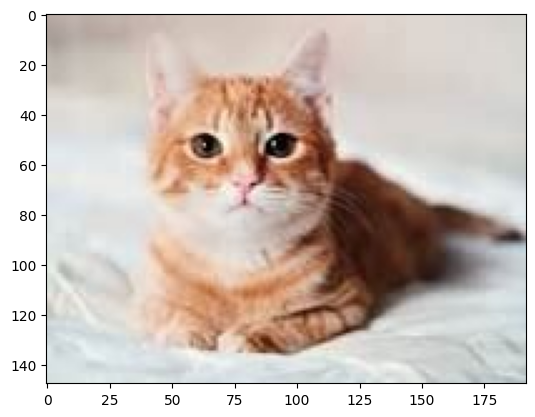

In [ ]:
plt.imshow(cat)

In [ ]:
from skimage import transform

In [ ]:
resize=transform.resize(cat,(32,32,3))

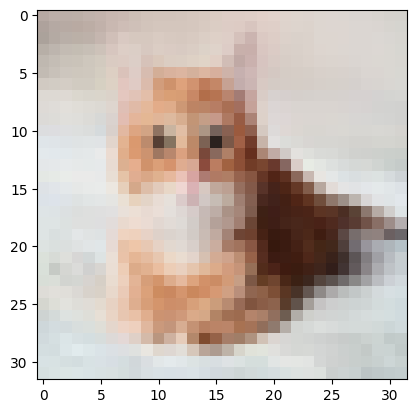

In [ ]:
plt.imshow(resize)

In [ ]:
prediction=model.predict(np.array([resize]))
print(prediction)

1/1 [==============================] - 0s 26ms/step
[[0.09974059 0.0960594  0.10487371 0.09580027 0.10094056 0.09605286
  0.09647565 0.10508534 0.10474263 0.10022894]]


In [ ]:
list_index=[0,1,2,3,4,5,6,7,8,9]
x=prediction
for i in range(10):
    for j in range(10):
        if x[0][list_index[i]]>x[0][list_index[j]]:
            temp=list_index[i]
            list_index[i]=list_index[j]
            list_index[j]=temp
print(list_index)


[7, 2, 8, 4, 9, 0, 6, 1, 5, 3]


In [ ]:
for i in range(5):
        print(classification[list_index[i]])

horse
bird
ship
deer
truck
